In [2]:
import glaes as gl
import os
import pickle 
import matplotlib.pyplot as plt
import math 
import numpy as np
from glaes import _test_data_

 
landcoverPath = _test_data_['clc-aachen_clipped.tif']
regionPath = _test_data_['aachenShapefile.shp']

number of land use codes: 24
0 1


C:\Users\b396636\AppData\Local\Temp\ipykernel_16356\2743709154.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(math.ceil((len(landuses))/3), 3, n + 1)


1 2
2 3
3 4
4 6
5 7
6 8
7 9
8 10
9 11
10 12
11 16
12 18
13 20
14 21
15 23
16 24
17 25
18 26
19 27
20 29
21 36
22 40
23 41


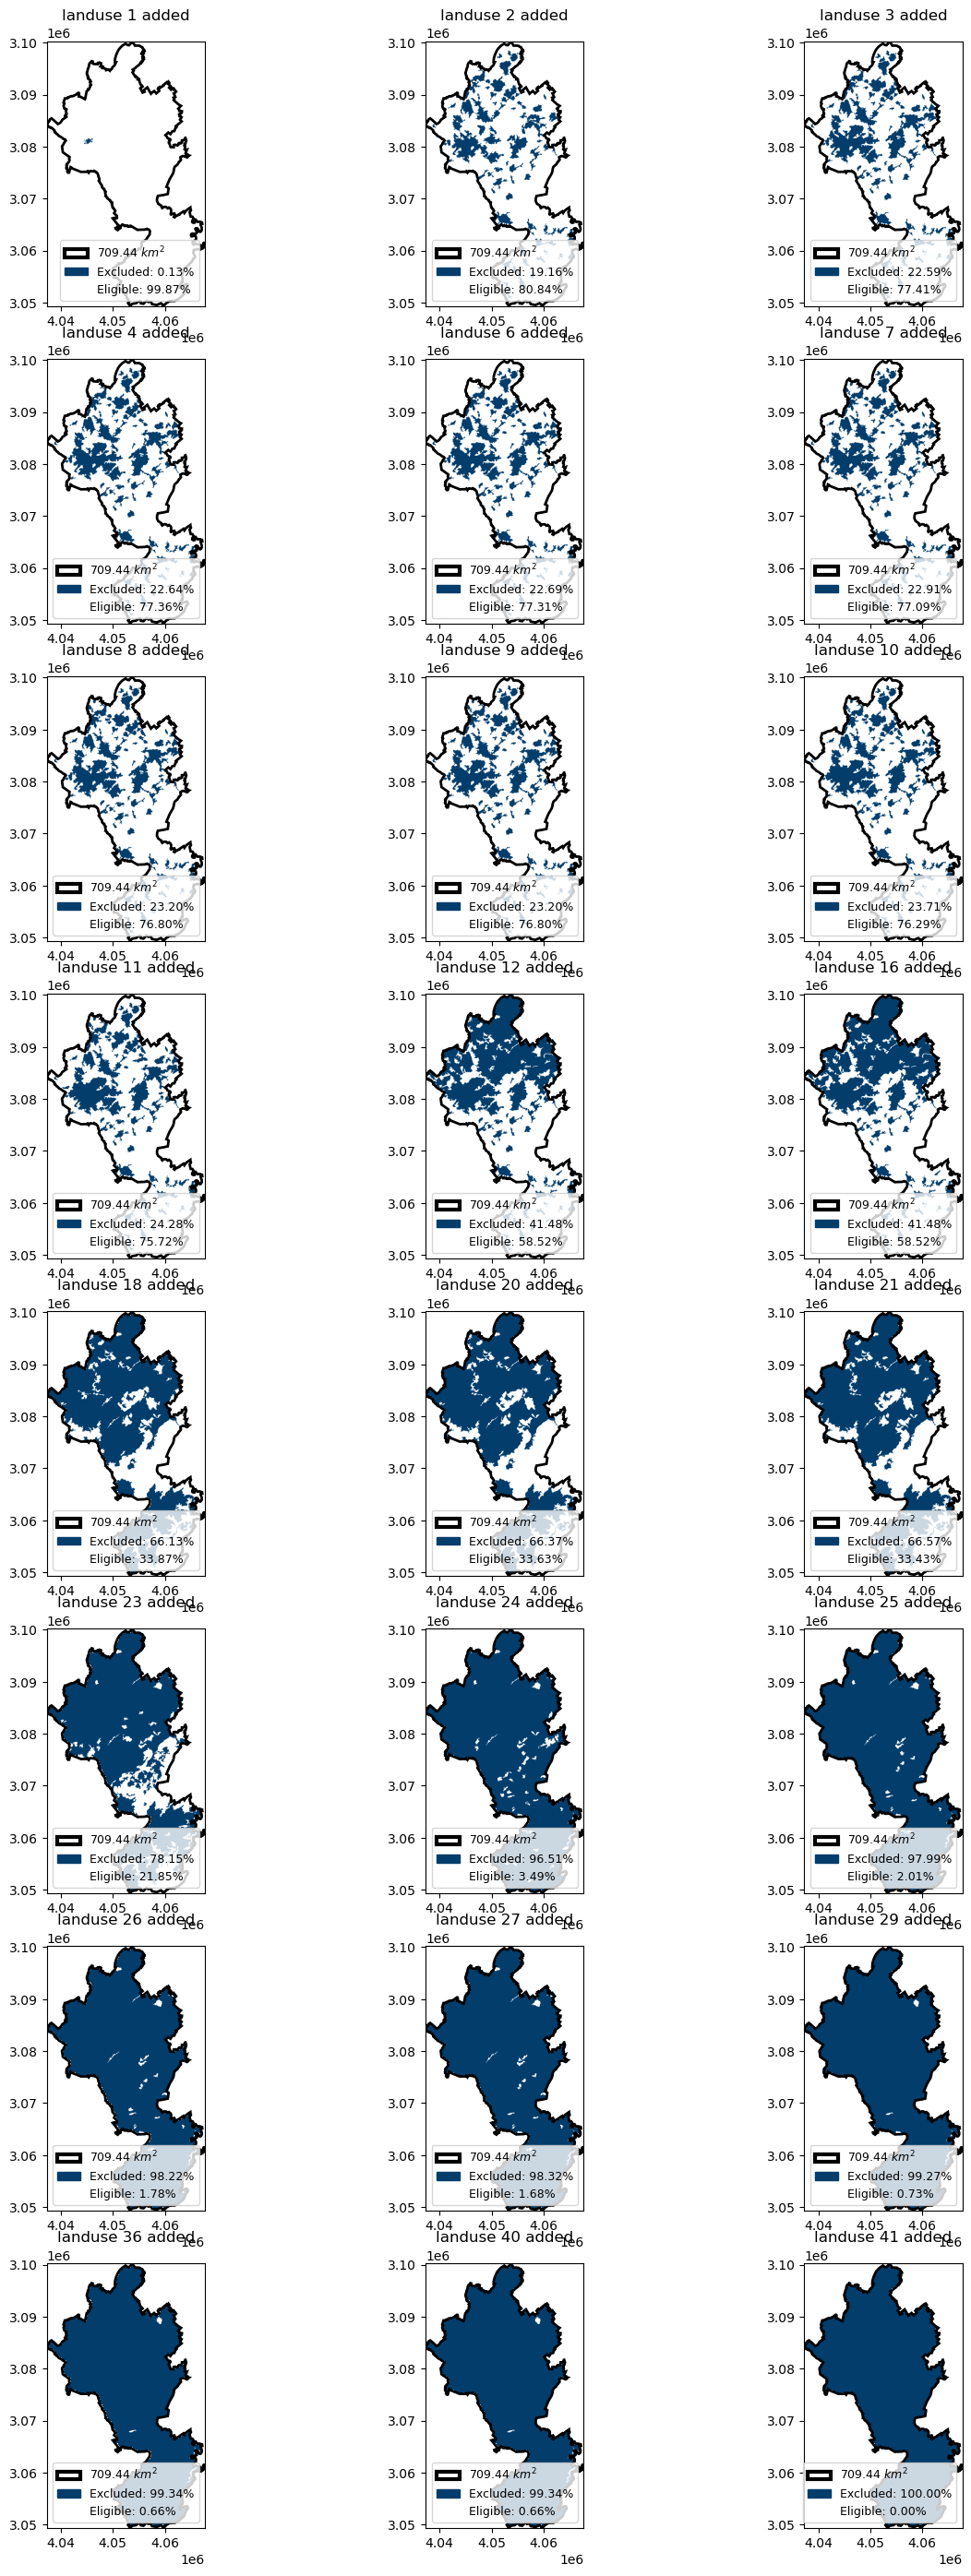

In [4]:
#get unique landuses by reading .tif in another env with rasterio and search for unique values in array with numpy
landuses = [ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 16, 18, 20, 21, 23, 24, 25, 26, 27, 29, 36, 40, 41] #Aachen glaes (24)

print(f'number of land use codes: {len(landuses)}')

plt.figure(figsize=(15, 35))

#plot plain study region first, then add plots where land use codes where added iteratively in the loop
ec = gl.ExclusionCalculator(regionPath, srs=3035, pixelRes=100)
ax = plt.subplot(math.ceil((len(landuses)+1)/3), 3, 1)
ec.draw(ax=ax, legendargs={'fontsize':9})

# loop through the length of landuses and keep track of index
for n, landuse in enumerate(landuses):
    print(n, landuse)

    # add a new subplot iteratively
    ax = plt.subplot(math.ceil((len(landuses))/3), 3, n + 1)

    ec.excludeRasterType(landcoverPath, value=landuse, prewarp=True) #without prewarp=True more eligible area in the end

    #ec.save(f'glaes-aachen-{landuse}.tif')

    ec.draw(ax=ax, legendargs={'fontsize':9})  #, goodColor='g', excludedColor='w'
    ax.set_title(f'landuse {landuse} added')

    

### Exploring GLAES exclusions

value : tuple or numeric
The exact value, or value range to exclude

If Numeric, should be The exact value to exclude

If ( Numeric, Numeric ), the low and high boundary describing the range of values to exclude,\
If either boundary is given as None, then it is interpreted as unlimited

If any other iterable : The list of exact values to accept

If str : The formatted set of elements to accept\
Each element in the set is seperated by a ","\
Each element must be either a singular numeric value, or a range\
A range element begins with either "[" or "(", and ends with either "]" or ")" and should have an '-' in between\
"[" and "]" imply inclusivity\
"(" and ")" imply exclusivity\
Numbers on either side can be omitted, implying no limit on that side\
Examples:\
"[1-5]" -> Indicate values from 1 up to 5, inclusively\
"[1-5)" -> Indicate values from 1 up to 5, but not including 5\
"(1-]" -> Indicate values above 1 (but not including 1) up to infinity\
"[-5]" -> Indicate values from negative infinity up to and including 5\
"[-]" -> Indicate values from negative infinity to positive infinity (dont do this..)\

<Axes: >

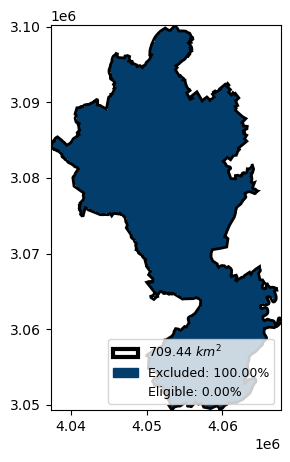

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))

ec = gl.ExclusionCalculator(regionPath, srs=3035, pixelSize=100)

#ec.excludeRasterType(landcoverPath, value=("[-200-500]")) 
#ec.excludeRasterType(landcoverPath, value=[1,26,27]) #exclude the codes 1, 26, 27
ec.excludeRasterType(landcoverPath, value="[-128-42]") 
#ec.excludeRasterType(landcoverPath, value="[-]") 
ec.draw(ax=ax, legendargs={'fontsize':9})